In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import *

In [33]:
path = "C:\\Users\\USER\\Documents\\GitHub\\mulherescomputacao\\Formulario\\Respostas_Forms_ETL.csv"
df = pd.read_csv(path)

In [3]:
df.columns

Index(['Unnamed: 0', 'Carimbo de data/hora', 'ETINIA', 'RENDA_FAMILIAR',
       'TRABALHOU_GRAD', 'TEVE_AUXUILIO', 'TIPO_AUXILIO', 'BOLSISTA',
       'TIPO_BOLSA', 'TIPO_INST_EM', 'INICIATIVA_FOMENTO', 'TIPO_INICIATIVA',
       'IMPORTANCIA_INICIATIVA', 'FATORES_ESCOLHA', 'ANO_INGRESSO',
       'IDADE_INGRESSO', 'COTISTA', 'TIPO_COTA', 'METODO_INGRESSO',
       'VINCULO_ATUAL_UFES', 'ATUACAO_AREA', 'CARREIRA_ACADEMICA',
       'ESCOLARIDADE_ATUAL', 'ATIVIDADE_ATUAL', 'FATORES_DESISTENCIA',
       'PORCENTAGEM_CURSO', 'DIFICULDADES_GRAD', 'TIPO_EP_DOCENTE',
       'DESCRICAO_EP_DOCENTE', 'PRESENCIOU_EP_DOCENTE', 'TIPO_EP_DISCENTE',
       'DESCRICAO_EP_DISCENTE', 'SUGESTÕES', 'EMAIL', 'PRECENCIOU_EP_DISCENTE',
       'ANO_FORMATURA', 'TEMPO_NA_UFES', 'INTERVALO_ANO', 'INTERVALO_RENDA',
       'INSTITUICAO_EM'],
      dtype='object')

In [4]:
list_fatores_escolha = list(df.FATORES_ESCOLHA.unique())


In [5]:
multi_values_cols = ['TIPO_EP_DISCENTE', 'TIPO_EP_DOCENTE', 
                     'DIFICULDADES_GRAD','FATORES_ESCOLHA',
                     'ATIVIDADE_ATUAL']

In [6]:
result_dataframes = {}

for column in multi_values_cols:
    df[column] = df[column].str.split(', ')
    tag_counts = df[column].explode().value_counts()
    df_result = pd.DataFrame({'Tag': tag_counts.index, 'Count': tag_counts.values})
    result_dataframes[column] = df_result



In [7]:
sns.set_theme(style="whitegrid", palette="pastel")

In [8]:
result_dataframes[multi_values_cols[2]] = result_dataframes[multi_values_cols[2]].drop(10)
result_dataframes[multi_values_cols[2]] = result_dataframes[multi_values_cols[2]].drop(11)

In [9]:
result_dataframes[multi_values_cols[2]].at[8,'Count'] = 3

In [10]:
result_dataframes[multi_values_cols[3]].at[0,'Tag'] = " Afinidade com matérias de ciências da natureza e \n matemática antes de entrar na faculdade"

In [11]:
result_dataframes[multi_values_cols[2]]

,Tag,Count
0,Dificuldade com as matérias de exatas do curso,41
1,Dificuldade com as matérias de computação do c...,27
2,Desconforto gerado pelo ambiente predominantem...,25
3,Dificuldades financeiras,20
4,Falta de representatividade feminina na área,17
5,Algum episódio de preconceito ou perseguição,12
6,Problemas pessoais,4
7,Dificuldades relacionadas a Pandemia de COVID-19,2
8,Dificuldades com as matérias/depto. de Eng. El...,3
9,Morar longe da faculdade,2


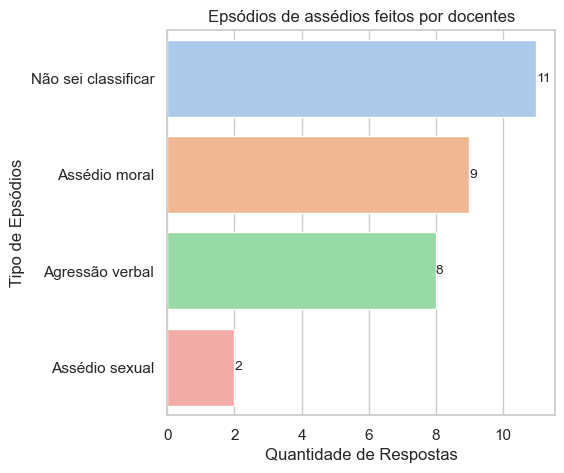

In [12]:
barplot_multilabel(result_dataframes[multi_values_cols[1]],
                    y='Tag', x='Count', title='Epsódios de assédios feitos por docentes', 
                    ylabel='Tipo de Epsódios', xlabel='Quantidade de Respostas', figsize=(5,5))

Text(0.5, 1.0, 'Tipo de cotas utilizadas')

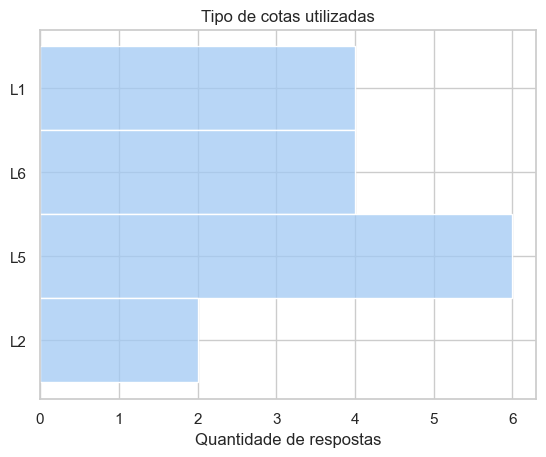

In [13]:
sns.histplot(df,  y = 'TIPO_COTA')
#plt.figure(figsize=())
plt.ylabel("")
plt.xlabel("Quantidade de respostas")
plt.title('Tipo de cotas utilizadas')

In [14]:
multi_label = ['METODO_INGRESSO', 'CARREIRA_ACADEMICA']

In [15]:
result_dfs = {}


for column in multi_label:
    print(column)
    df[column] = df[column].str.split(', ')
    tag_counts = df[column].explode().value_counts()
    df_result = pd.DataFrame({'Tag': tag_counts.index, 'Count': tag_counts.values})
    result_dfs[column] = df_result


METODO_INGRESSO
CARREIRA_ACADEMICA


In [16]:
result_dfs[multi_label[0]]

,Tag,Count
0,Vestibular/SISU,63
1,Transferência Interna - outro curso,1


In [17]:
result_dataframes[multi_values_cols[3]].at[0,'Tag'] = " Afinidade com matérias de ciências da natureza e \n matemática antes de entrar na faculdade"

In [18]:
result_dfs[multi_label[1]].at[3,'Tag'] = "Suporte de infraestutura de laboratório \n (Suporte ou LAR no DI)"
result_dfs[multi_label[1]].at[6,'Tag'] = "Suporte de infraestutura de laboratório \n (Em outro centro)"


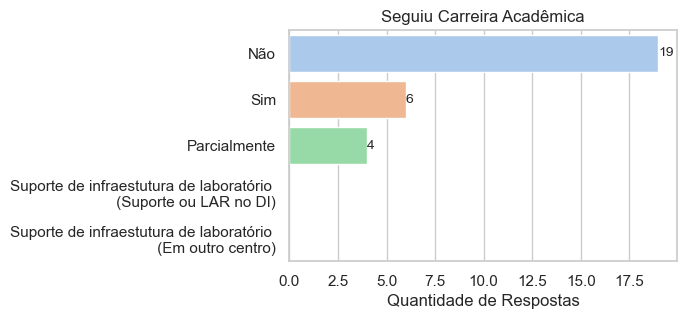

In [19]:
barplot_multilabel(result_dfs[multi_label[1]],
                    y='Tag', x='Count', title='Seguiu Carreira Acadêmica', 
                    ylabel='', xlabel='Quantidade de Respostas', figsize=(5,3))

In [20]:
df['CARREIRA_ACADEMICA'].value_counts()

[Não]             19
[Sim]              6
[Parcialmente]     4
Name: CARREIRA_ACADEMICA, dtype: int64

In [21]:
df['CARREIRA_ACADEMICA'].unique()

TypeError: unhashable type: 'list'

In [ ]:
print(len(multi_label))

In [22]:
def custom_create_subplots(dataframes, column_names, titles, maintitle, figsize=(15, 5)):
    fig, axs = plt.subplots(1, len(dataframes), figsize=figsize) 
    
    fig.suptitle(maintitle)
    for i, dataframe in enumerate(dataframes):
        column_name = column_names[i]
        title = titles[i]
        
        value_counts = dataframe[column_name].value_counts()
        labels = dataframe[column_name].unique()
        
        # Cria o gráfico de pizza no subplot correspondente
        wedges, _, autotexts = axs[i].pie(value_counts, labels=labels, autopct='%.0f%%')
        
        # Adiciona os valores absolutos como anotações em cada fatia do gráfico
        absolute_values = value_counts.values
        for j, autotext in enumerate(autotexts):
            autotext.set_text(f'{autotext.get_text()} ({absolute_values[j]})')
        
        #axs[i].legend()
        axs[i].set_title(title)
    
    plt.tight_layout()  # Ajusta o layout dos subplots
    plt.show()

In [34]:
concluintes = df[df['VINCULO_ATUAL_UFES'] == 'Concluiu a graduação']

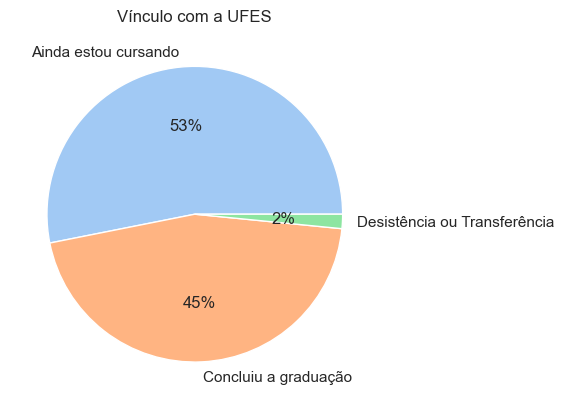

In [29]:
pie_plot(df, 'VINCULO_ATUAL_UFES', 'Vínculo com a UFES')

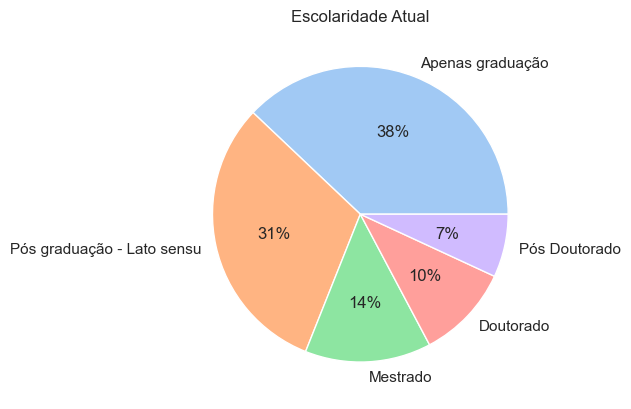

In [37]:
pie_plot(concluintes, "ESCOLARIDADE_ATUAL", "Escolaridade Atual")

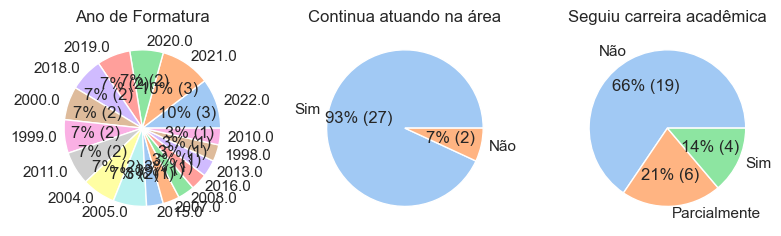

In [36]:
custom_create_subplots([concluintes,concluintes,concluintes],
                       ['ANO_FORMATURA', 'ATUACAO_AREA', 'CARREIRA_ACADEMICA'],
                ['Ano de Formatura',
                 "Continua atuando na área", 
                 'Seguiu carreira acadêmica'],
                maintitle='', figsize=(8,5))

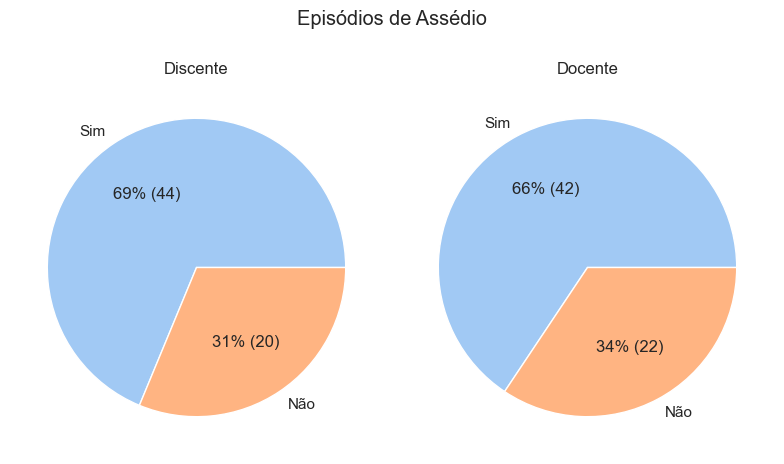

In [38]:
custom_create_subplots([df,df],['PRECENCIOU_EP_DISCENTE', 'PRESENCIOU_EP_DOCENTE'],
                ["Discente",'Docente',
                 "Idade ao ingressar"],
                maintitle='Episódios de Assédio', figsize=(8,5))

In [ ]:
df["ESCOLARIDADE_ATUAL"].value_counts()

In [ ]:
create_subplots([df,df,df],
                ['INSTITUICAO_EM', 'ETINIA','VINCULO_ATUAL_UFES'],
                ["Tipo de Instituição EM",'Etnia declarada', "Vínculo atual"],
                maintitle='',figsize=(10,5))

In [ ]:
create_subplots([df,df,df],
                ['TRABALHOU_GRAD', 'TEVE_AUXUILIO', 'TIPO_AUXILIO'],
                ["Trabalhou Graduação", "Recebeu auxílio", "Tipo de auxílio"],
                maintitle='', figsize=(10,5))

In [ ]:
df['ATUACAO_AREA'].value_counts()

In [ ]:
pie_plot(df, 'ATUACAO_AREA', 'Trabalhou durante a graduação')

In [ ]:
#investigar o caso de cota em 2000

In [ ]:
#quando a PROAECI começou = 2014